# titanic data load

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 전처리

**NULL 컬럽들에 대한 전처리**

In [12]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

In [13]:
print(f"Sex 값 분포: {titanic_df['Sex'].value_counts()}")
print(f"Cabin 값 분포: {titanic_df['Cabin'].value_counts()}")
print(f"Embarked 값 분포: {titanic_df['Embarked'].value_counts()}")

Sex 값 분포: male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포: N              687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
D30              1
D45              1
C62 C64          1
A5               1
D47              1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [14]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
print(f"Cabin 값 분포: \n{titanic_df['Cabin'].value_counts()}")

0    N
1    C
2    N
Name: Cabin, dtype: object
Cabin 값 분포: 
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [15]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

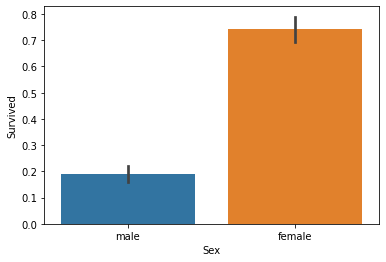

In [18]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

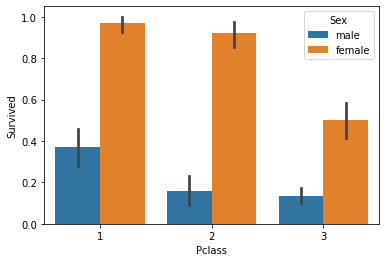

In [20]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

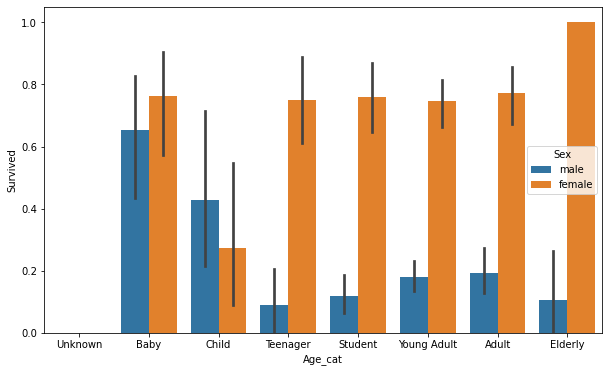

In [21]:
# 입력 age에 따라 구분값을 반환하는 함수 설정, DataFrame의 apply lambda에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child','Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환 값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼 값을 받아서 행당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data = titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [27]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex','Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# Model

In [28]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.25, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print(f'DecisionTreeClassifier 정확도: {accuracy_score(y_test, dt_pred):.4f}')
print(f'RandomForestClassifier 정확도: {accuracy_score(y_test, rf_pred):.4f}')
print(f'LogisticRegression 정확도: {accuracy_score(y_test, lr_pred):.4f}')

DecisionTreeClassifier 정확도: 0.7354
RandomForestClassifier 정확도: 0.8027
LogisticRegression 정확도: 0.8027


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores= []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} 정확도: {accuracy:.4f}')
        
    mean_score = np.mean(scores)
    print(f'평균 정확도: {mean_score:.4f}')

In [34]:
# DecisionTreeClassifier
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7318
교차 검증 1 정확도: 0.7640
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7823


In [35]:
# RandomForestClassifier
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.7654
교차 검증 1 정확도: 0.8146
교차 검증 2 정확도: 0.8146
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8483
평균 정확도: 0.8014


In [36]:
# LogisticRegression
exec_kfold(lr_clf, folds=5)

교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7584
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7890


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

## Cross_val_score

In [37]:
from sklearn.model_selection import cross_val_score

def cross_val(clf):
    scores = cross_val_score(clf, X_titanic_df, y_titanic_df, cv=5)
    
    for iter_count, accuracy in enumerate(scores):
        print(f'교차 검증 {iter_count} 정확도: {accuracy:.4f}')
        
    print(f'평균 정확도: {np.mean(scores):.4f}')

In [38]:
# DecisionTreeClassifier
cross_val(dt_clf)

교차 검증 0 정확도: 0.7654
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7978
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7890


In [39]:
# RandomForestClassifier
cross_val(rf_clf)

교차 검증 0 정확도: 0.7821
교차 검증 1 정확도: 0.7921
교차 검증 2 정확도: 0.8258
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8652
평균 정확도: 0.8104


In [40]:
# LogisticRegression
cross_val(lr_clf)

교차 검증 0 정확도: 0.7989
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.7978
평균 정확도: 0.7845


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [47]:
%%time
from sklearn.model_selection import GridSearchCV

parmeters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_rf = GridSearchCV(rf_clf, param_grid=parmeters, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

print(f'GridSearchCV 최적의 하이퍼 파라미터: {grid_rf.best_params_}')
print(f'GridSearchCV 최고 정확도: {grid_rf.best_score_:.4f}')
best_rfclf = grid_rf.best_estimator_

rf_predictions = best_rfclf.predict(X_test)
accuracy = accuracy_score(y_test, rf_predictions)
print(f'테스트 세트에서의 RandomForestClassifier 정확도: {accuracy:.4f}')

GridSearchCV 최적의 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8249
테스트 세트에서의 RandomForestClassifier 정확도: 0.8251
Wall time: 20.1 s
